In [32]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score # Cross Validation Function.
from sklearn.model_selection import KFold # KFold Class.
from sklearn.linear_model import LinearRegression # Linear Regression class.
from sklearn.model_selection import train_test_split

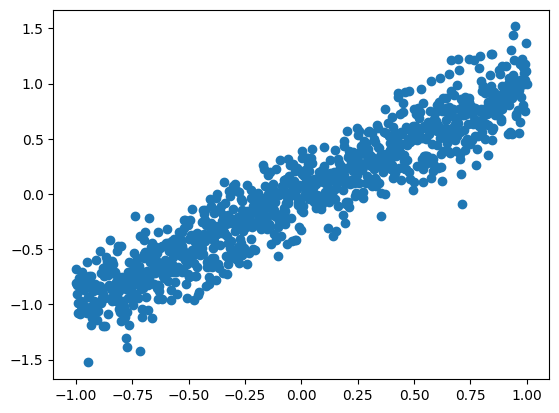

In [33]:
n = 1000
s = 0.2
f_hertz = 1000

X = np.linspace(-1, 1, n)
n_x = s*np.random.randn(n)
y = X + n_x


plt.scatter(X, y)

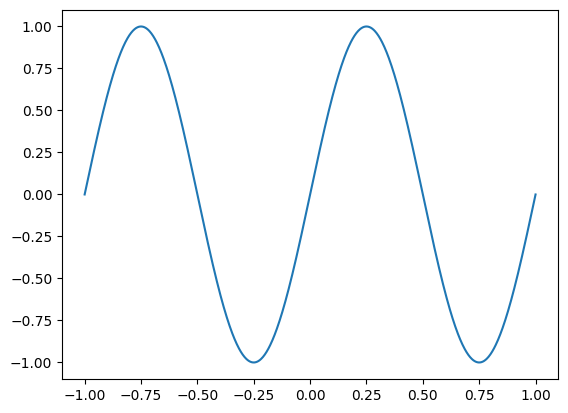

In [52]:
def f(x):
    return np.sin(2*np.pi*f_hertz*x) 


plt.plot(X, f(X))

In [49]:
X = X.reshape(-1,1)

fold_number = 10

kf = KFold(n_splits=fold_number, )

#Stores R2 scores for each fold
scores = []

# Lists to store training and validation errors in each fold
train_errors = []
val_errors = []

In [53]:
for train_index, test_index in kf.split(X):
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]
    
    # Instantiate and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the training set
    y_train_pred = model.predict(X_train)
    
    # Calculate the training error
    train_error = y_train - y_train_pred
    train_errors.append(train_error)
    
    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)
    
    # Calculate the validation error
    val_error = y_val - y_val_pred
    val_errors.append(val_error)

train_errors = np.concatenate(train_errors)
val_errors = np.concatenate(val_errors)

Shape of training errors array: (9000,)
Shape of validation errors array: (1000,)


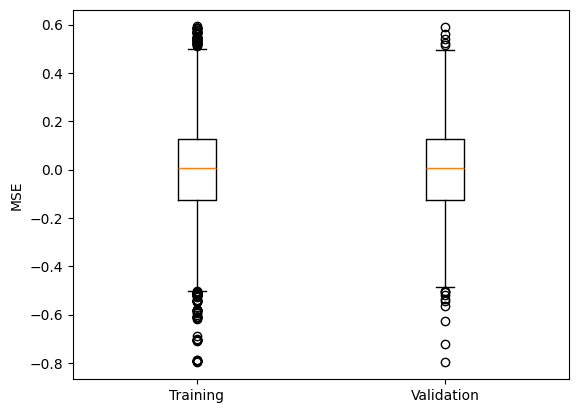

In [54]:
# Display the shapes of the arrays
print("Shape of training errors array:", train_errors.shape)
print("Shape of validation errors array:", val_errors.shape)

#plot the errors with boxplot
plt.boxplot([train_errors, val_errors], labels=['Training', 'Validation'])
plt.ylabel('MSE')
plt.show()

In [31]:


x = x.reshape(-1, 1)

model  = LinearRegression()
kfold  = KFold(n_splits=100, shuffle=True) # shuffle=True, Shuffle (embaralhar) the data.
result = cross_val_score(model, x, y, cv = kfold)

print("K-Fold (R^2) Scores: {0}".format(result))
print("Mean R^2 for Cross-Validation K-Fold: {0}".format(result.mean()))

K-Fold (R^2) Scores: [0.92586423 0.90573803 0.6073753  0.94944289 0.93341961 0.71015718
 0.80817101 0.80401635 0.90819261 0.93547097 0.94363611 0.87479801
 0.92657567 0.93737483 0.95264092 0.89115584 0.95944894 0.79028561
 0.80937527 0.90213301 0.80046173 0.90405555 0.92821932 0.94096361
 0.90858032 0.84299464 0.89122134 0.87528511 0.92565944 0.87011524
 0.80917655 0.71347913 0.87662528 0.9454342  0.95392374 0.93912107
 0.90970541 0.9411454  0.712178   0.68347873 0.87557672 0.9407493
 0.86332296 0.90350459 0.89224833 0.92388403 0.91319716 0.87162067
 0.89082931 0.85609255 0.94241227 0.86277124 0.9415825  0.94224885
 0.80003609 0.87077772 0.8888219  0.95904136 0.63267585 0.70010201
 0.89631669 0.97155765 0.93947333 0.84881505 0.94317055 0.93006953
 0.90979767 0.92000454 0.91083546 0.88430839 0.86245857 0.79976779
 0.89477919 0.92102368 0.82271398 0.88764262 0.91684502 0.70418362
 0.20415693 0.82223615 0.86224332 0.87950338 0.95052951 0.88370254
 0.66722385 0.80994823 0.8618348  0.946729